In [2]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
from matplotlib import pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [6]:
import re

In [75]:
%store -r liste_commune

In [76]:
liste_commune;

### Dataframe erstellen

Vorgehen: Elemente aus Strings herausfischen, datieren und zählen. Grund für das coden in reinem Python: Beim Tokenisieren ohne Stemmen werden Wörter wie "Budget", "Budgetverhandlung", "Klima", "Klimas", u.ä. getrennt und damit separat gezählt. Das Stemmen funktioniert aber weder mit nltk oder spacy, weil wichtige Wörter wie Westast, Expo, Agglolac nicht gehandelt werden können.

Dafür braucht es für alle Wörter, über die ich auch schreibe, eine visuelle Nachkontrolle in Studio Visual Code; nicht dass etwa Wörter-als-Strings Teile von anderen Wörtern bilden.

In [77]:
# Define the folder path containing the text files
folder_path = "/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_de_fr"

# Define the list of string elements to search for
liste_commune

# Initialize a list to store dictionaries
data_list = []

# Iterate over each text file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        # Extract the index (first seven digits of the file name)
        index = file_name[:7]
        
        # Read the contents of the text file
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
        
        # Calculate the length of the text file (string length)
        file_length = len(text)
        
        # Initialize a dictionary to store the data for this file
        file_data = {'Index': index, 'File_Length': file_length}

        # Convert the text to lowercase
        text_lower = text.lower()

        # Count the occurrences of each string element in the lowercase text
        #file_counts = {element: text_lower.count(element) for element in liste_commune}

        file_counts = {element: len(re.findall(element, text_lower)) for element in liste_commune}
        
        # Add the counts to the dictionary
        file_data.update(file_counts)
        
        # Append the dictionary to the list
        data_list.append(file_data)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Set the index of the DataFrame
df.set_index('Index', inplace=True)

# Display the resulting DataFrame
df

,File_Length,haushalt,greta thunberg,steuern,impôts,stadion,stades,stadtpolizei,police municipale,einbürgerung,...,jeunes,jugend,police,polizei,bilinguisme,zweisprachigkeit,francophone,frankophone,frankofone,welsch
Index,,,,,,,,,,,,,,,,,,,,,
2012-12,147414,0,0,0,2,0,1,0,0,0,...,15,0,23,0,0,0,0,0,0,0
2021-11,44742,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-02,77475,0,0,0,1,0,1,0,1,0,...,14,0,5,0,0,0,1,0,0,0
2008-03,65558,0,0,0,2,0,0,0,1,0,...,2,0,3,0,0,0,0,0,0,0
2022-12,165675,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12,96115,0,0,0,0,0,1,0,0,0,...,5,0,0,0,2,0,0,0,0,0
2013-03,60326,0,0,0,0,0,0,0,0,0,...,5,0,1,0,2,0,4,0,0,0
2006-06,260201,4,0,10,0,40,22,3,0,0,...,0,0,0,9,0,0,0,1,0,0


### Zusammenfassen von ähnlichen Einträgen

Die Wörter in beiden Sprachen müssen addiert werden, ebenso die Synonyme. Das muss manuell erfolgen.

In [78]:
df_original = df.copy()

In [79]:
df["GELD"]=df[' chf']+df['francs']+df['geld']+df['argent'];#unregelmässigkeiten --> manuelles vorgehen
df["KOSTEN"]=df['kosten']+df['coûts'];
df["STADTORDNUNG"]=df["stadtordnung"]+df["règlement de la ville"];
df["VERKEHR"]=df["verkehr"]+df["circulation"];
df["ENERGIE"]=df["energie"]+df["énergie"];
#df["INVESTITION"]=df["investition"]+df["investissement"]
df["PARKPLAETZE"]=df["parkplätze"]+df["parking"];
df["STRASSE"]=df["route"]+df["strasse"];
df["KONGRESSHAUS"]=df["kongresshaus"]+df["palais des congrès"];
df["FINANZEN"]=df["finances"]+df["finances"];
df["SPAREN"]=df[" sparen"]+df["économies"]#auf frz mit s, damit nicht 'wirtschaft' mitkommt
df["BUDGET"]=df["budgetiert"]+df["budget"]+df["haushalt "];
df["INVESTITIONSPLANUNG"]=df["investitionsplanung"]+df["planification des investissements"];
df["BAHNHOFPLATZ"]=df["bahnhofplatz"]+df["place de la gare"];
df["NEUMARKTPLATZ"]=df["neumarktplatz"]+df["place du marché neuf"];
df["WOHNSITZZULAGE"]=df["wohnsitzzulage"]+df["allocation de résidence"];
df["WESTAST"]=df["westast"]+df["axe ouest"];
df["KLIMA"]=df["klima"]+df["climat"];
df["KULTUR"]=df["kultur"]+df["culture"];
df["SCHULE"]=df["schule"]+df["école"];
df["PERSONAL"]=df["personal"]+df["personnel"];
df["SICHERHEIT"]=df["sicherheit"]+df["sécurité"];
df["BAUARBEITEN"]=df["bauarbeiten"]+df["travaux"];
df["KINDER"]=df["kinder"]+df["enfants"];
df["FINANZIERUNG"]=df["financement"]+df["finanzierung"];
df["SCHWEIZ"]=df["schweiz"]+df["suisse"];
df["JUGEND"]=df["jugend"]+df["jeunes"];#jugend-liche,jungend
df["POLIZEI"]=df["polizei"]+df["police"];
df["BILINGUISMUS"]=df["bilinguisme"]+df["zweisprachigkeit"];
df["FRANKOPHONE"]=df["francophone"]+df["frankophone"]+df["frankofone"]+df["welsch"];#unregelmässigkeiten --> manuelles vorgehen
df["EXPO"]=df['expo[ ,.]'];#schönerer name
df["WESTAST"]=df['westast']+df['axe ouest'];
df["STADTPOLIZEI"]=df['stadtpolizei']+df['police municipale'];
df["EINBUERGERUNG"]=df["einbürgerung"]+df["naturalisation"];
df["STADIEN"]=df["stadion"]+df["stades"]
df["STEUERN"]=df["steuern"]+df["impôts"]

In [83]:
df.columns[-34:]

Index(['GELD', 'KOSTEN', 'STADTORDNUNG', 'VERKEHR', 'ENERGIE', 'PARKPLAETZE',
       'STRASSE', 'KONGRESSHAUS', 'FINANZEN', 'SPAREN', 'BUDGET',
       'INVESTITIONSPLANUNG', 'BAHNHOFPLATZ', 'NEUMARKTPLATZ',
       'WOHNSITZZULAGE', 'WESTAST', 'KLIMA', 'KULTUR', 'SCHULE', 'PERSONAL',
       'SICHERHEIT', 'BAUARBEITEN', 'KINDER', 'FINANZIERUNG', 'SCHWEIZ',
       'JUGEND', 'POLIZEI', 'BILINGUISMUS', 'FRANKOPHONE', 'EXPO',
       'STADTPOLIZEI', 'EINBUERGERUNG', 'STADIEN', 'STEUERN'],
      dtype='object')

In [13]:
df_all = df.copy() #bisheriges dataframe speichern als kopie

In [93]:
columns_select = list(df_all.columns[-37:])

### Ersten Plot erstellen

Mit allen Einträgen > relativ messy

In [94]:
df = df_all.loc[:,columns_select].copy()

In [95]:
df.index = pd.to_datetime(df.index)

In [96]:
df = df.sort_index()

In [97]:
df.columns

Index(['frankophone', 'frankofone', 'welsch', 'GELD', 'KOSTEN', 'STADTORDNUNG',
       'VERKEHR', 'ENERGIE', 'PARKPLAETZE', 'STRASSE', 'KONGRESSHAUS',
       'FINANZEN', 'SPAREN', 'BUDGET', 'INVESTITIONSPLANUNG', 'BAHNHOFPLATZ',
       'NEUMARKTPLATZ', 'WOHNSITZZULAGE', 'WESTAST', 'KLIMA', 'KULTUR',
       'SCHULE', 'PERSONAL', 'SICHERHEIT', 'BAUARBEITEN', 'KINDER',
       'FINANZIERUNG', 'SCHWEIZ', 'JUGEND', 'POLIZEI', 'BILINGUISMUS',
       'FRANKOPHONE', 'EXPO', 'STADTPOLIZEI', 'EINBUERGERUNG', 'STADIEN',
       'STEUERN'],
      dtype='object')

In [98]:
num_cols = len(list(df.columns))-1

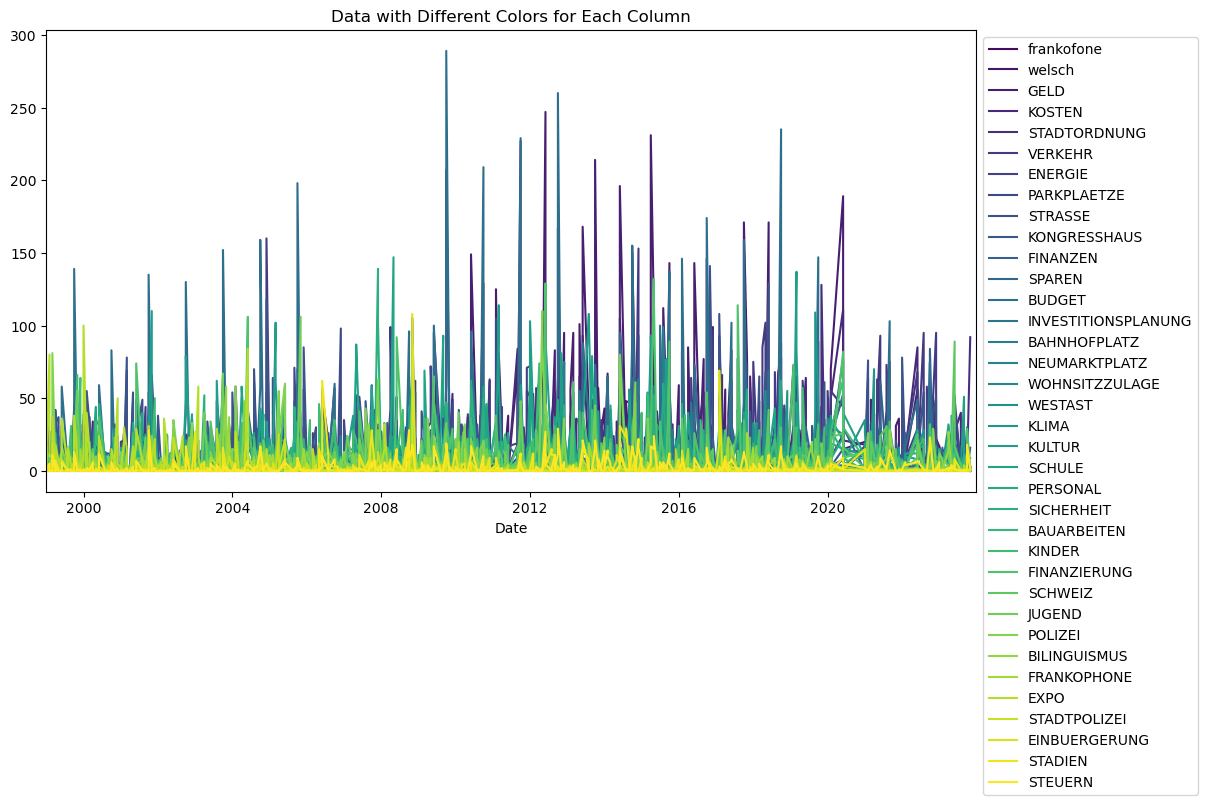

In [99]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[1:], start=1):  # Start from 1 to skip the datetime-index column
    plt.plot(df.index, df[column], label=column, color=plt.cm.viridis(i / num_cols))  # Use different colors
plt.title('Data with Different Colors for Each Column')
plt.xlabel('Date')
#plt.ylabel('Values (Divided by {})'.format(divisor))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2023-12-31'))  # Set x-axis limits
plt.show()

### Analyse


In [100]:
hot_topics = df.max().sort_values(ascending=False).head(18)
hot_topics

BUDGET           289
GELD             247
VERKEHR          160
SCHULE           147
STRASSE          141
SICHERHEIT       139
KULTUR           137
FINANZIERUNG     132
STADTORDNUNG     128
KOSTEN           111
POLIZEI          110
KLIMA            109
EINBUERGERUNG    108
JUGEND           106
PARKPLAETZE      105
ENERGIE          105
EXPO             100
NEUMARKTPLATZ     99
dtype: int64

In [101]:
data_table1 = pd.DataFrame(hot_topics,columns=['Hot Topics'])
data_table1;

In [103]:
evergreen_topics = df.mean().sort_values(ascending=False).head(18)
evergreen_topics

GELD            20.162427
BUDGET          17.393346
VERKEHR         14.082192
STRASSE         12.933464
KOSTEN          12.908023
KULTUR          12.726027
SCHULE          11.751468
SICHERHEIT       9.260274
FINANZIERUNG     8.835616
KINDER           8.659491
PERSONAL         8.495108
ENERGIE          6.921722
SCHWEIZ          6.475538
POLIZEI          5.882583
FINANZEN         5.726027
PARKPLAETZE      5.273973
JUGEND           4.986301
STADTORDNUNG     4.135029
dtype: float64

In [104]:
data_table2 = pd.DataFrame(evergreen_topics,columns=['evergreens'])
data_table2;

In [105]:
data_table1.to_csv('hot_topics.csv')
data_table2.to_csv('evergreens.csv')

Und nun noch die Schnittmenge aller interessierenden Sujets (maxes and means)

In [106]:
topics = list(set(evergreen_topics.keys()) | set(hot_topics.keys()))
topics

['VERKEHR',
 'KULTUR',
 'JUGEND',
 'KLIMA',
 'GELD',
 'STADTORDNUNG',
 'POLIZEI',
 'SCHWEIZ',
 'EXPO',
 'BUDGET',
 'FINANZIERUNG',
 'ENERGIE',
 'PERSONAL',
 'EINBUERGERUNG',
 'STRASSE',
 'KINDER',
 'KOSTEN',
 'SICHERHEIT',
 'FINANZEN',
 'NEUMARKTPLATZ',
 'PARKPLAETZE',
 'SCHULE']

In [107]:
df.sum().sort_values(ascending=False)

GELD                   10303
BUDGET                  8888
VERKEHR                 7196
STRASSE                 6609
KOSTEN                  6596
KULTUR                  6503
SCHULE                  6005
SICHERHEIT              4732
FINANZIERUNG            4515
KINDER                  4425
PERSONAL                4341
ENERGIE                 3537
SCHWEIZ                 3309
POLIZEI                 3006
FINANZEN                2926
PARKPLAETZE             2695
JUGEND                  2548
STADTORDNUNG            2113
EXPO                    1544
STEUERN                 1438
BAUARBEITEN             1336
KLIMA                   1150
BILINGUISMUS            1066
KONGRESSHAUS             988
SPAREN                   919
FRANKOPHONE              897
STADIEN                  820
BAHNHOFPLATZ             773
INVESTITIONSPLANUNG      592
STADTPOLIZEI             515
WESTAST                  489
EINBUERGERUNG            380
NEUMARKTPLATZ            308
WOHNSITZZULAGE           126
welsch        

### Plots

Nun aus den interessanten Elementen Plots machen

In [116]:
pair = ["KLIMA","WESTAST"]# Variablen ändern: 'BUDGET', 'VERKEHR'

In [110]:
#import numpy as np
from scipy.signal import savgol_filter

In [111]:
df_test = df[[col for col in df.columns if col in pair]].copy()

In [112]:
df_res_sel = df_test.resample('6M').mean()#.interpolate(method='polynomial',order=7)

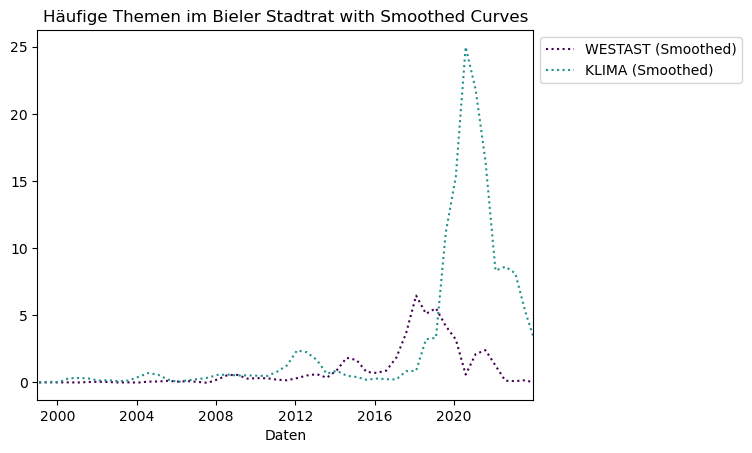

In [113]:
smoothed_data = savgol_filter(df_res_sel.values, window_length=5, polyorder=3, axis=0)

for i, column in enumerate(df_res_sel.columns[0:], start=0):
    plt.plot(df_res_sel.index, smoothed_data[:, i], label=column + ' (Smoothed)', linestyle=':', color=plt.cm.viridis(i / (len(df_res_sel.columns))))  # Smoothed data

# Add titles, labels, legend, and set x-axis limits
plt.title('Häufige Themen im Bieler Stadtrat with Smoothed Curves')
plt.xlabel('Daten')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2023-12-31'))

# Save the figure
plt.savefig('budget.png', dpi=300, bbox_inches='tight')
plt.show()

Problem: Hier kann man keine Werte ablesen. Daher besser scharfe peaks mit gleitendem mittel

In [58]:
df_test = df[[col for col in df.columns if col in pair]].copy()

In [114]:
df_res_sel = df_test.resample('1M').mean()#Möglichkeit eines resampling, allerdings dann keine ablesbaren werte

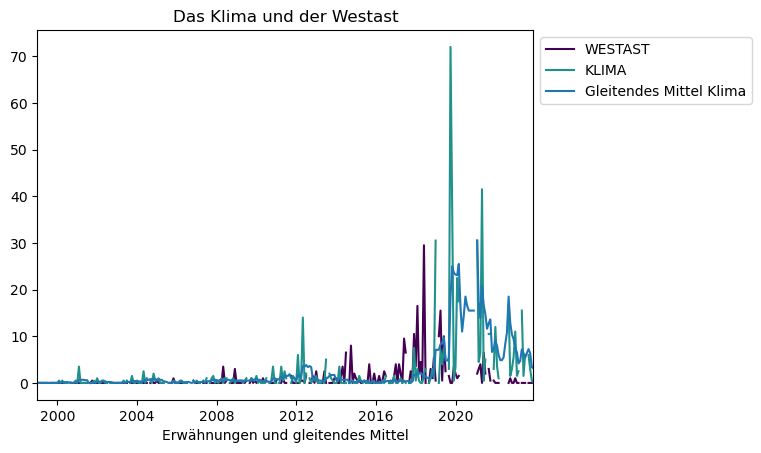

In [115]:
for i, column in enumerate(df_res_sel.columns[0:], start=0):
    plt.plot(df_res_sel.index, df_res_sel[column], label=column, color=plt.cm.viridis(i / len(df_res_sel.columns)))

# Calculate and plot the rolling average on the same axis
moving_avg = df_res_sel['KLIMA'].rolling(window=6, min_periods=1).mean()
plt.plot(df_res_sel.index, moving_avg, label='Gleitendes Mittel Klima')

# Add titles, labels, legend, and set x-axis limits
plt.title('Das Klima und der Westast')
plt.xlabel('Erwähnungen und gleitendes Mittel')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2023-11-30'))

# Save the figure
plt.savefig('klima2.png', dpi=600, bbox_inches='tight')
plt.show()

### Peaks identifizieren

Um den Kontext eines Peaks zu verstehen, muss ich ins originale .txt des Protokolls. Dazu hilft auch das Ranking der höchsten Nennungen pro Sitzung.

In [117]:
df["VERKEHR"].sort_values(ascending=False).head(38) #Andere Variablen: 'KLIMA', 'WESTAST', 'BUDGET'

Index
2004-12-01    160
2014-12-01    153
2018-05-01    102
2008-04-01     99
2016-11-01     99
2016-12-01     96
2022-12-01     95
2022-08-01     95
2009-06-01     95
2017-02-01     93
2021-06-01     93
2018-04-01     85
2018-01-01     75
2012-12-01     75
2017-11-01     74
2021-08-01     73
2001-03-01     69
2022-06-01     68
2018-08-01     68
2001-11-01     66
2021-02-01     64
2016-05-01     64
2010-12-01     63
2019-05-01     62
2008-12-01     62
2004-08-01     61
2005-10-01     60
2004-02-01     58
2022-09-01     58
2006-10-01     57
2014-06-01     57
2012-03-01     57
2005-12-01     56
2020-01-01     55
2020-02-01     55
2015-08-01     52
2019-03-01     52
2006-06-01     52
Name: VERKEHR, dtype: int64

Oder die Summe aller Nennungen in 25 Jahren

In [119]:
df["VERKEHR"].sum()

7196

### Deutsch vs. français, wann hatte wer mehr Worte auf Lager?

nltk-tokenization aller textfiles in beiden sprachen über die zeit in ein df eintragen.

In [120]:
from nltk.tokenize import word_tokenize

In [121]:
# Define the folder path containing the text files
folder_path = "/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_de"

# Initialize a list to store dictionaries
list_token_de = []

# Iterate over each text file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        # Extract the index (first seven digits of the file name)
        index = file_name[:7]
        
        # Read the contents of the text file
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
        
        # Calculate the length of the text file (string length)
        token = len(word_tokenize(text))
        
        # Initialize a dictionary to store the data for this file
        file_data = {'Index': index, 'File_Length': token}
        
        # Append the dictionary to the list
        list_token_de.append(file_data)

# Convert the list of dictionaries to a DataFrame
df_de = pd.DataFrame(list_token_de)

# Set the index of the DataFrame
df_de.set_index('Index', inplace=True)

# Display the resulting DataFrame
df_de

,File_Length
Index,
2022-12,28495
2011-10,30215
2011-11,7520
2000-04,17590
2000-05,17568
...,...
2023-02,13338
2010-01,17453
2004-08,19112


In [122]:
df_de.index = pd.to_datetime(df_de.index)
df_de = df_de.sort_index()
df_de;

In [123]:
# Define the folder path containing the text files
folder_path = "/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles_fr"

# Initialize a list to store dictionaries
list_token_fr = []

# Iterate over each text file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        # Extract the index (first seven digits of the file name)
        index = file_name[:7]
        
        # Read the contents of the text file
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
        
        # Calculate the length of the text file (string length)
        token = len(word_tokenize(text))
        
        # Initialize a dictionary to store the data for this file
        file_data = {'Index': index, 'File_Length': token}
        
        # Append the dictionary to the list
        list_token_fr.append(file_data)

# Convert the list of dictionaries to a DataFrame
df_fr = pd.DataFrame(list_token_fr)

# Set the index of the DataFrame
df_fr.set_index('Index', inplace=True)

# Display the resulting DataFrame
df_fr

,File_Length
Index,
2012-12,26013
2021-11,7952
2008-02,13908
2008-03,11442
2015-01,8144
...,...
1999-11,8012
2009-12,16863
2013-03,10364


In [124]:
df_fr.index = pd.to_datetime(df_fr.index)
df_fr = df_fr.sort_index()
df_fr

,File_Length
Index,
1999-01-01,13002
1999-02-01,3983
1999-03-01,18672
1999-04-01,10317
1999-05-01,4707
...,...
2023-05-01,11565
2023-06-01,36135
2023-08-01,7172


In [125]:
df_language = pd.merge(df_de, df_fr, on='Index', how='inner')

In [126]:
df_language

,File_Length_x,File_Length_y
Index,,
1999-01-01,16689,13002
1999-02-01,18800,3983
1999-03-01,34388,18672
1999-04-01,28282,10317
1999-05-01,14280,4707
...,...,...
2023-05-01,8234,11565
2023-06-01,40042,36135
2023-08-01,14902,7172


In [128]:
df_language["Fraction Français"] = df_language["File_Length_y"]/(df_language["File_Length_x"]+df_language["File_Length_y"]) 

In [129]:
df_language

,File_Length_x,File_Length_y,Fraction Français
Index,,,
1999-01-01,16689,13002,0.437910
1999-02-01,18800,3983,0.174823
1999-03-01,34388,18672,0.351904
1999-04-01,28282,10317,0.267287
1999-05-01,14280,4707,0.247906
...,...,...,...
2023-05-01,8234,11565,0.584120
2023-06-01,40042,36135,0.474356
2023-08-01,14902,7172,0.324907


In [131]:
trends = df_language.apply(calculate_trend)
trends

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,File_Length_x,File_Length_y,Fraction Français
0,1.215245e-32,6.069895e-33,1.861280e-37
1,1.614835e-14,8.065762e-15,2.473295e-19


### Die restlichen Plots

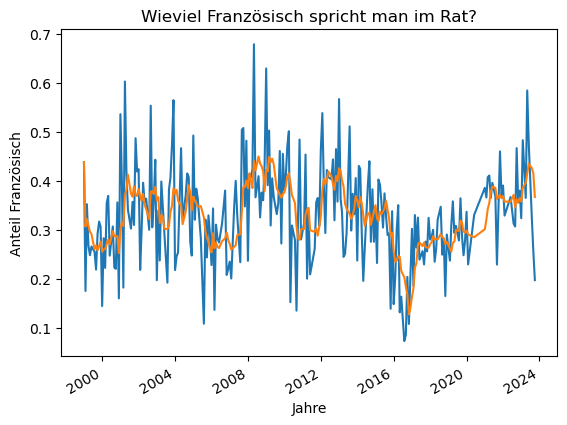

In [132]:
ax = df_language['Fraction Français'].plot()#linestyle=':')

moving_avg = df_language['Fraction Français'].rolling(window=6, min_periods=1).mean()
moving_avg.plot(ax=ax, label='Gleitendes Mittel')


# Add title and labels
plt.title('Wieviel Französisch spricht man im Rat?')
plt.xlabel('Jahre')
plt.ylabel('Anteil Französisch')

#plt.legend()
plt.savefig('frankofonie.png', format='png',dpi=600)
# Show the plot
plt.show()

In [133]:
df_language['Fraction Français'].mean()

0.32930682320078436

#### Der Budget-Plot

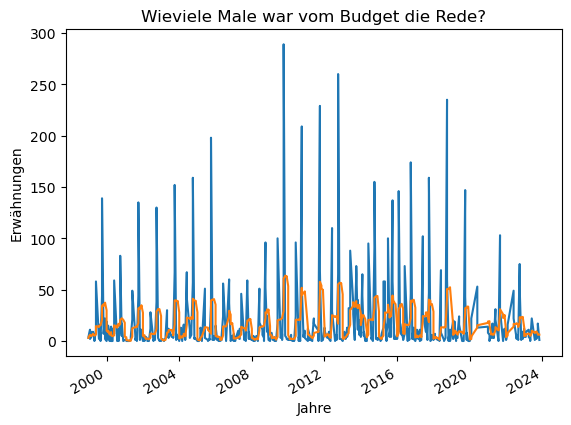

In [134]:
ax = df['BUDGET'].plot()#linestyle=':')

moving_avg = df['BUDGET'].rolling(window=6, min_periods=1).mean()
moving_avg.plot(ax=ax, label='Gleitendes Mittel')


# Add title and labels
plt.title('Wieviele Male war vom Budget die Rede?')
plt.xlabel('Jahre')
plt.ylabel('Erwähnungen')

#plt.legend()
plt.savefig('budget.png', format='png',dpi=600)
# Show the plot
plt.show()

#### Der Verkehrs-Plot

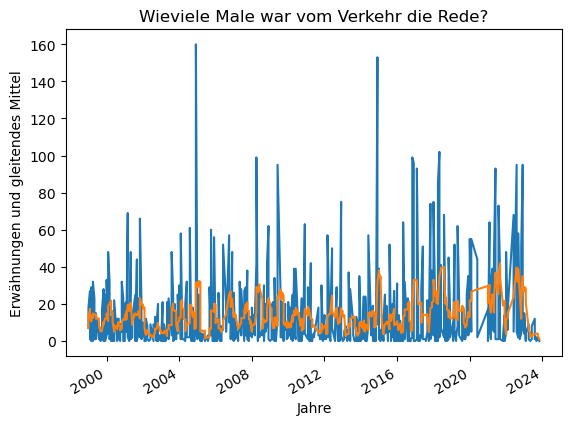

In [135]:
ax = df['VERKEHR'].plot()#linestyle=':')

moving_avg = df['VERKEHR'].rolling(window=6, min_periods=1).mean()
moving_avg.plot(ax=ax, label='Gleitendes Mittel')


# Add title and labels
plt.title('Wieviele Male war vom Verkehr die Rede?')
plt.xlabel('Jahre')
plt.ylabel('Erwähnungen und gleitendes Mittel')

#plt.legend()
plt.savefig('verkehr.png', format='png',dpi=600)
# Show the plot
plt.show()

In [748]:
df['VERKEHR'].sort_values(ascending=False)

Index
2004-12-01    160
2014-12-01    153
2018-05-01    102
2008-04-01     99
2016-11-01     99
             ... 
2016-04-01      0
2005-08-01      0
2016-05-01      0
2005-06-01      0
2023-11-01      0
Name: VERKEHR, Length: 511, dtype: int64